# Is Fandango's rating is reliable ?

The project is about analyisis of Fandango's rating - website, where you can buy tickets for a movies, spectacles and so on. The goal of the project is to check whether showed ratings on their website are higher than real values - for example 4.5 was rounded to 5 (what was the case before article  https://fivethirtyeight.com/features/fandango-movies-ratings/ has been published). 

Data sets to compare if anything has changed:

https://github.com/fivethirtyeight/data/tree/master/fandango - before article has bee n published

https://github.com/mircealex/Movie_ratings_2016_17 - most pupular movies  ratings from 2016 and 2017 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read original data
fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")
movie_ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")

In [4]:
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [6]:
fandango_older = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_older.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
fandango_16_17 = movie_ratings_16_17[['movie', 'year', 'fandango']]
fandango_16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Those two data set were sampled in not totally random way. First is sampled from all the movies which the tickets has been sold in 2015 and has at least 30 Fandango reviews. 

The second one is sampled by choosing only popular movies in 2016 and 2017.

Due to not full randomness it is not perfect to describe whole population. Let remind that we want to compare whether after publishing article mentioned above the rating in fandango has changed. We need to slighly modify current goal of analysis or retrieve new data.

It easier to redefine goal which is similiar to the previous one. 

Let's compare ratings of popular movies in 2015 and 2016

In [8]:
#Take 10 samples to check manually
fandango_16_17.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


To checked if the samples from the second data set are popular (according to first set - if has at least 30 ratings). Due to lack of information in data set I checked manually 10 random movies on website. All except "Cell" has more than 30 ratings, so I assumed that data set with movies from 2016 and 2017 contains popular ones.  

In [9]:
#Filter movies from 2015 and 2016
fandango_16 = fandango_16_17[fandango_16_17["year"]==2016]
fandango_15 = fandango_older[fandango_older["FILM"].str[-5:-1].astype(int)==2015]

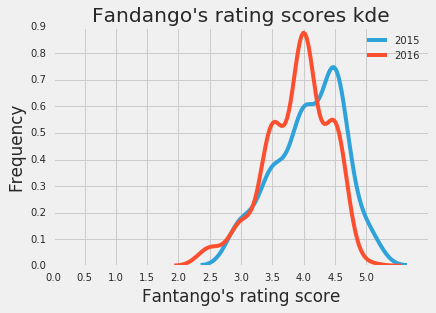

In [17]:
#kde plots
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()
sns.kdeplot(data=fandango_15["Fandango_Stars"],ax=ax)
sns.kdeplot(data=fandango_16["fandango"],ax=ax)

ax.set_title("Fandango's rating scores kde")
ax.legend(["2015","2016"])
ax.set_ylabel("Frequency")
ax.set_xlabel("Fantango's rating score")
ticks = ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

Shapes of the histograms is similiar to the normal distributions. The shape of the histogram created from the data from 2015 is more symetical than the  histogram from 2016 movies. The rating scores from 2015 is shifted to the higher score. The peak for 2015 is on value 4.5, for the newer data set most values are in 4. It is also visible that in the newer movies ratings there are very small amount of 5 star ratings (nearly zero), it is not the case for the older set. It shows that the ratings scores decreased when we compare 2015 and 2016.

In [11]:
#frequency tables
fandango_15["Fandango_Stars"].value_counts(normalize=True)*100

4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [12]:
fandango_16["fandango"].value_counts(normalize=True)*100

4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

Frequencies tables also shows that there are discrepancies between older ratings and newer. It is visible for example in 5 star rating, which frequency has decresed about 6 percent for movies in 2016. What more, after publishing article, in newer ratings appears lower star values like 2.5 which was not visible in earlier movies ratings.

In [13]:
#get mean, median, and mode
def get_stats(df):
    print("mean = {},\nmedian = {},\nmode = {}".
          format(df.mean(),df.median(),df.mode()[0])
         )
    return (df.mean(),df.median(),df.mode()[0])

In [14]:
f_15_stats = get_stats(fandango_15["Fandango_Stars"])

mean = 4.0852713178294575,
median = 4.0,
mode = 4.5


In [15]:
f_16_stats=get_stats(fandango_16["fandango"])

mean = 3.887434554973822,
median = 4.0,
mode = 4.0


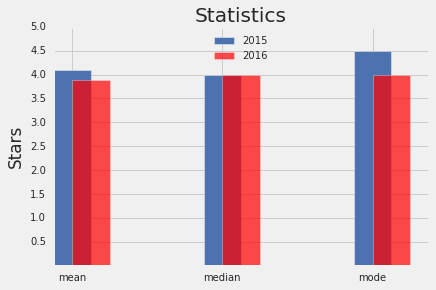

In [25]:
#visualize statistics in bar plot
plt.style.use('fivethirtyeight')
width=0.25
pos = list(range(3))

fig,ax = plt.subplots()
ax.bar(pos,f_15_stats,width,label="2015")
ax.bar([p + width*0.5 for p in pos],
        f_16_stats,width,label="2016", color='red',alpha=0.7)

ax.set_title('Statistics')
ax.legend(['2015', '2016'], loc='upper center')
ax.set_xticklabels(["mean","median","mode"])
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_ylabel("Stars")
ticks = ax.set_yticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])


# Conclusion

Comparing popular movies from 2015 and 2016 shows that rating has changed. After publishing article the movies ratings decreased. It looks that ratings is no more rounded to the higher values, however, ratings distribution still looks moved towards higher stars values. Let see which ratings website seems to be most reliable.

In [43]:
fandango_score_comparison["avg_rating"] = fandango_score_comparison[["RT_norm","Metacritic_norm","IMDB_norm","Fandango_Ratingvalue"]].mean(axis=1)

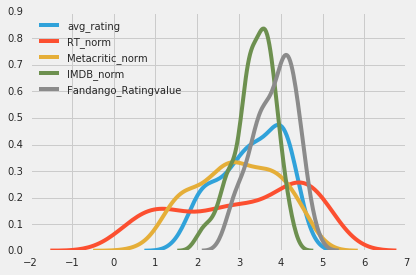

In [53]:
sns.kdeplot(data=fandango_score_comparison["avg_rating"])
sns.kdeplot(data=fandango_score_comparison["RT_norm"])
sns.kdeplot(data=fandango_score_comparison["Metacritic_norm"])
sns.kdeplot(data=fandango_score_comparison["IMDB_norm"])
sns.kdeplot(data=fandango_score_comparison["Fandango_Ratingvalue"])

It seems that kde average plot is most similiar to the Matacritic ratings kde plot. Distributions of the ratings should be more or less similiar to the normal distributions. Most of the movies should have average ratings - around 2.5 stars. In reality there are much less ver 